# Handling Imbalanced Data

In [4]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

## Making the dataset

In [5]:
#setting a seed
np.random.seed(912)

#creating a df with two categories

n = 1000        #total sample

#category split is 9:1. category 0 has 900 samples other has 100
c0_ratio = 0.9

nc0= int(n * c0_ratio) #category 0 sample points

nc1 = n - nc0       ##category 1 sample points
(nc0, nc1)

(900, 100)

In [6]:
category0 = pd.DataFrame({
    "feature1" : np.random.normal(0,1, nc0),
    "feature2" : np.random.normal(0,1, nc0),
    "target" : [0] * nc0
})

category1 = pd.DataFrame({
    "feature1" : np.random.normal(0,1, nc1),
    "feature2" : np.random.normal(0,1, nc1),
    "target" : [1] * nc1
})

In [7]:
imbalanced_df = pd.concat([category0, category1], axis = 0)     #will concatenate by the columns means new rows will be added

imbalanced_df       #since we didn't include reset_index method this will have the index 0 to 899 then again 0 to 99

,feature1,feature2,target
0,-0.213950,0.197360,0
1,1.888450,1.847285,0
2,-0.672371,-0.926437,0
3,0.256054,-0.382164,0
4,-1.126118,-0.593033,0
...,...,...,...
95,0.774179,-0.677380,1
96,-0.986109,0.568897,1
97,0.074162,-1.317835,1
98,-1.490417,-1.334180,1


In [8]:
imbalanced_df.reset_index(drop = True)      #reset the index from 0 to 999

,feature1,feature2,target
0,-0.213950,0.197360,0
1,1.888450,1.847285,0
2,-0.672371,-0.926437,0
3,0.256054,-0.382164,0
4,-1.126118,-0.593033,0
...,...,...,...
995,0.774179,-0.677380,1
996,-0.986109,0.568897,1
997,0.074162,-1.317835,1
998,-1.490417,-1.334180,1


In [9]:
imbalanced_df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### Upsampling or Over-Sampling


> It's a Resampling technique used for handling imbalanced data. Theory can be learnt from Statistical Sample survey books.


The process to increase the lesser sample category to the same no

In [10]:
df_minority = imbalanced_df[imbalanced_df['target'] == 1]
df_majority = imbalanced_df[imbalanced_df['target'] == 0]
df_minority

,feature1,feature2,target
0,1.675497,-0.673460,1
1,-1.162210,-1.367434,1
2,-1.936614,-0.189571,1
3,1.294086,1.137439,1
4,2.698395,1.557538,1
...,...,...,...
95,0.774179,-0.677380,1
96,-0.986109,0.568897,1
97,0.074162,-1.317835,1
98,-1.490417,-1.334180,1


In [11]:
df_majority

,feature1,feature2,target
0,-0.213950,0.197360,0
1,1.888450,1.847285,0
2,-0.672371,-0.926437,0
3,0.256054,-0.382164,0
4,-1.126118,-0.593033,0
...,...,...,...
895,1.208987,-1.213077,0
896,-1.589107,1.224198,0
897,3.001275,1.161777,0
898,0.116231,-0.668511,0


In [12]:
# PERFORMING UP-SAMPLING
from sklearn.utils import resample # type: ignore

In [13]:
df_minority_upsampled = resample(df_minority, replace = True,  #sample with replacement
                                n_samples = len(df_majority),   # to match the sample points
                                random_state = 95
                                )

In [14]:
df_minority_upsampled.shape

(900, 3)

In [15]:
df_minority_upsampled['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [16]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled]).reset_index(drop = True)
df_upsampled

,feature1,feature2,target
0,-0.213950,0.197360,0
1,1.888450,1.847285,0
2,-0.672371,-0.926437,0
3,0.256054,-0.382164,0
4,-1.126118,-0.593033,0
...,...,...,...
1795,-0.327195,-0.541360,1
1796,0.723317,-1.048706,1
1797,-0.787749,-0.414206,1
1798,0.324814,0.347397,1


In [17]:
df_upsampled.shape

(1800, 3)

In [18]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


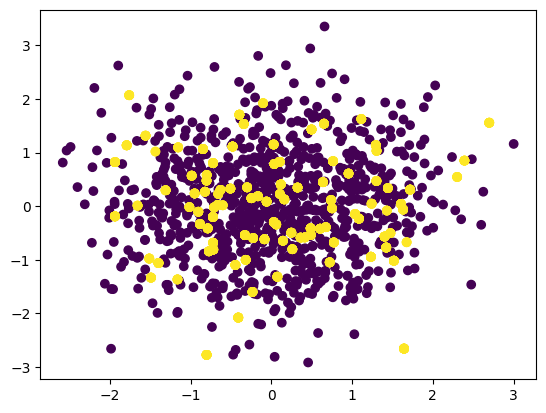

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x = df_upsampled["feature1"], y = df_upsampled["feature2"], c = df_upsampled['target'])

In [20]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64



> **Now we have successfully convert the imbalanced data to a balanced data**



### Down-Sampling or Under-Sampling

In [21]:
df_majority_down_sampled = resample(df_majority,
                                    replace = False,      #THIS IS THE MAIN DIFFERENCE. SAMPLE WITHOUT REPLACEMENT, BY THIS WE WILL LOSE DATA
                                    n_samples = len(df_minority),
                                    random_state = 95
                                    )

In [22]:
df_majority_down_sampled.shape # type: ignore

(100, 3)

In [23]:
df_majority_down_sampled['target'].value_counts() # type: ignore


target
0    100
Name: count, dtype: int64

In [24]:
df_downsampled = pd.concat([df_majority_down_sampled, df_minority]).reset_index(drop = True) # type: ignore
df_downsampled

,feature1,feature2,target
0,0.359624,-1.695110,0
1,-0.095572,0.047071,0
2,-0.211263,-1.634589,0
3,1.208987,-1.213077,0
4,0.519159,-0.075130,0
...,...,...,...
195,0.774179,-0.677380,1
196,-0.986109,0.568897,1
197,0.074162,-1.317835,1
198,-1.490417,-1.334180,1


In [25]:
df_downsampled.shape

(200, 3)

In [26]:
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

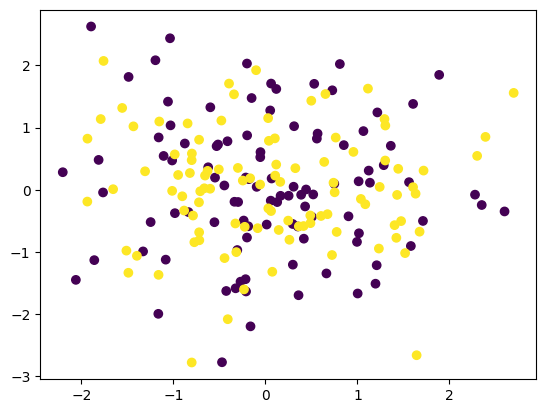

In [27]:
plt.scatter(x = df_downsampled.feature1 , 
            y = df_downsampled.feature2 ,
            c = df_downsampled.target)

## SMOTE